In [4]:
import collections.abc

#hyper needs the four following aliases to be done manually.
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping

In [5]:
from os import path
import os
import numpy as np
import re
#import pandas as pd
import pyedflib
import pickle
import mne
import matplotlib.pyplot as plt

In [6]:
def from_pickle(path):
    with open(path, 'rb') as f:
        obj = pickle.load(f)
    return obj

In [7]:
path_raw_ECG = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData\\ECG_MAHNOB_Dictinary.p'
path_raw_data = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\privateData'
all_ecg = from_pickle(path_raw_ECG)
meta = from_pickle(path.join(path_raw_data, "Metadata_dict.p"))
labels = from_pickle(path.join(path_raw_data, "Label_Dict.p"))

(14848, 1)


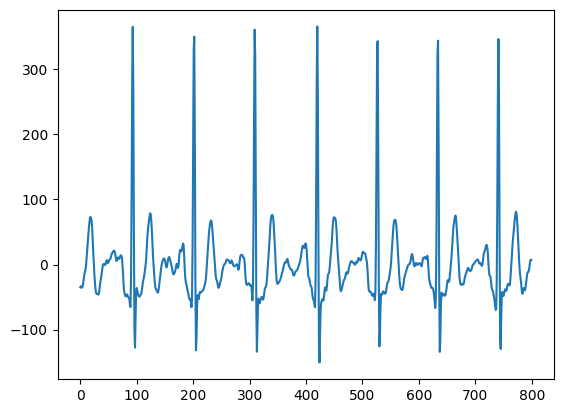

In [21]:
ecg_ = all_ecg[2]
print(ecg_.shape)
#eeg_ = eeg_.reshape(32, -1)
#ecg['2'].shape
#data = data.flatten()
#eeg_[:,0],eeg_[:,0].shape
plt.plot(-ecg_[80*20:80*30])

In [9]:
path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\mahnob_ecg'
file_path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\mahnob_ecg\\2\\recording_132.edf'
ann_path = 'C:\\Users\\chedl\\OneDrive\\Bureau\\EMSE\\3A\\PE\\mahnob_ecg\\2\\annotation_132.edf'

In [16]:
# Set the path of the directory where you want to create the new directories
# Create 30 directories with names corresponding to their numbers in the specified directory\n",
for i in range(1, 31):
    dir_name = f'{i}'
    os.mkdir(os.path.join(path, dir_name))

In [17]:
n_channels = 1
signal_labels = ['ECG']
physical_dimensions = ['mV']
physical_min = [-10]
physical_max = [10]
digital_min = [-32767]
digital_max = [32767]

In [23]:
# Iterate through the subject IDs and their corresponding data dictionaries
for subject_id, subject_session in meta.items():
    # Create the path to the subject directory
    subject_dir_path = os.path.join(path, str(subject_id))
    # Open the subject directory
    os.startfile(subject_dir_path)

    # Iterate through the session IDs and their corresponding data dictionaries for the current subject
    for session in subject_session['sessionId']:
        session_data = all_ecg[session]
        #session_data = session_data.T
        #session_data = session_data.reshape(32, -1)
        # Create a Raw object from the preprocessed data
        edf_writer = pyedflib.EdfWriter(f"recording_ECG_{session}.edf", n_channels, file_type=pyedflib.FILETYPE_EDFPLUS)
        for i in range(n_channels):
            edf_writer.setSignalHeader(i, label=signal_labels[i], physical_dimension=physical_dimensions[i],
                               physical_minimum=physical_min[i], physical_maximum=physical_max[i],
                               digital_minimum=digital_min[i], digital_maximum=digital_max[i], transducer='None',
                               sample_rate=256)

        n_samples = session_data.size
        for i in range(n_samples):
            sample = [session_data[i]]
            edf_writer.writeSamples(sample)
        edf_writer.close()

TypeError: setSignalHeader() got an unexpected keyword argument 'label'

In [ ]:
raw = mne.io.read_raw_edf(file_path)
raw.plot(duration=4, start=0.0, n_channels=32)